<a id='top'></a>
# Pandas Notes 4
* [GroupBy](#groupby)
* [Aggregations](#agg)
* [Merge and Concatenation](#merge)
* [Pivot Table and Pivot Table Grouper](#pivot)
* [Data Wrangling and melt() function](#wrangling)
* [Stack](#stack)
* [Crosstab](#crosstab)

<a id='groupby'></a>
### GroupBy
[Back to top](#top)

In [2]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_csv('sampleData2.csv',parse_dates=['Date'])
df

Date      Month  Year  Customer ID  Customer Age  \
0      2013-11-26   November  2013        11019            19   
1      2015-11-26   November  2015        11019            19   
2      2014-03-23      March  2014        11039            49   
3      2016-03-23      March  2016        11039            49   
4      2014-05-15        May  2014        11046            47   
5      2016-05-15        May  2016        11046            47   
6      2014-05-22        May  2014        11047            47   
7      2016-05-22        May  2016        11047            47   
8      2014-02-22   February  2014        11094            35   
9      2016-02-22   February  2016        11094            35   
10     2013-07-30       July  2013        11101            32   
11     2015-07-30       July  2015        11101            32   
12     2013-07-15       July  2013        11109            34   
13     2015-07-15       July  2015        11109            34   
14     2013-08-02     August  2013        11176            29   
15     2015-08-02     August  2015        11176            29   
16     2013-09-02  September  2013        11176            29   
17     2015-09-02  September  2015        11176            29   
18     2014-01-22    January  2014        11176            29   
19     2016-01-22    January  2016        11176            29   
20     2014-05-17        May  2014        11176            29   
21     2016-05-17        May  2016        11176            29   
22     2014-03-27      March  2014        11196            51   
23     2016-03-27      March  2016        11196            51   
24     2013-08-25     August  2013        11203            49   
25     2015-08-25     August  2015        11203            49   
26     2013-12-26   December  2013        11203            49   
27     2015-12-26   December  2015        11203            49   
28     2014-01-02    January  2014        11211            48   
29     2016-01-02    January  2016        11211            48   
...           ...        ...   ...          ...           ...   
113006 2014-03-28      March  2014        28522            28   
113007 2016-03-28      March  2016        28522            28   
113008 2014-01-18    January  2014        28534            32   
113009 2016-01-18    January  2016        28534            32   
113010 2014-04-10      April  2014        28563            25   
113011 2016-04-10      April  2016        28563            25   
113012 2013-09-16  September  2013        29074            20   
113013 2015-09-16  September  2015        29074            20   
113014 2013-12-10   December  2013        29074            20   
113015 2015-12-10   December  2015        29074            20   
113016 2013-10-04    October  2013        29075            20   
113017 2015-10-04    October  2015        29075            20   
113018 2014-07-30       July  2014        29216            33   
113019 2016-07-30       July  2016        29216            33   
113020 2013-10-02    October  2013        29238            34   
113021 2015-10-02    October  2015        29238            34   
113022 2014-03-20      March  2014        29238            34   
113023 2016-03-20      March  2016        29238            34   
113024 2014-04-03      April  2014        29238            34   
113025 2016-04-03      April  2016        29238            34   
113026 2013-07-08       July  2013        29356            29   
113027 2015-07-08       July  2015        29356            29   
113028 2013-12-28   December  2013        29443            41   
113029 2015-12-28   December  2015        29443            41   
113030 2014-04-12      April  2014        29443            41   
113031 2016-04-12      April  2016        29443            41   
113032 2014-04-02      April  2014        29462            18   
113033 2016-04-02      April  2016        29462            18   
113034 2014-03-04      March  2014        29472            37   
113035 2016-03-04      March  2016        29472 

In [21]:
print('All Countries in DataFrame:',list(df.groupby('Country').groups.keys()))

All Countries in DataFrame: ['Australia', 'Canada', 'France', 'Germany', 'United Kingdom', 'United States']


In [27]:
print('Iterating through Groups:\n\n')

for name,group in df.groupby('Country'):
    print(name)
    print(group.head()[['Date','Country','Product Category','Profit']])

Iterating through Groups:


Australia
        Date    Country Product Category  Profit
2 2014-03-23  Australia      Accessories    1366
3 2016-03-23  Australia      Accessories    1188
4 2014-05-15  Australia      Accessories     238
5 2016-05-15  Australia      Accessories     297
6 2014-05-22  Australia      Accessories     199
Canada
         Date Country Product Category  Profit
0  2013-11-26  Canada      Accessories     590
1  2015-11-26  Canada      Accessories     590
14 2013-08-02  Canada      Accessories     369
15 2015-08-02  Canada      Accessories     517
16 2013-09-02  Canada      Accessories     148
France
         Date Country Product Category  Profit
50 2013-07-15  France      Accessories     427
51 2015-07-15  France      Accessories     427
52 2013-08-17  France      Accessories    1697
53 2015-08-17  France      Accessories    1636
60 2013-09-24  France      Accessories     356
Germany
         Date  Country Product Category  Profit
48 2013-08-07  Germany      Access

In [26]:
print('Selecting group using get_group():\n\n')

print(df.groupby('Country').get_group('United States').head()[['Date','Country','Product Category','Profit']])

Selecting group using get_group():


         Date        Country Product Category  Profit
22 2014-03-27  United States      Accessories     524
23 2016-03-27  United States      Accessories     407
34 2013-07-19  United States      Accessories     524
35 2015-07-19  United States      Accessories     524
38 2013-07-13  United States      Accessories     726


<a id='agg'></a>
### Aggregations
[Back to top](#top)

In [98]:
print('Total Revenue and Average Revenue in Year 2011 and 2012 in every Country:\n')

print(df.groupby(['Year','Country'])['Revenue'].agg([np.sum,np.mean]).loc[[2011,2012]])

Total Revenue and Average Revenue in Year 2011 and 2012 in every Country:

                         sum         mean
Year Country                             
2011 Australia       2529914  2945.185099
     Canada           789798  3494.681416
     France           946624  4062.763948
     Germany          833603  3577.695279
     United Kingdom   823481  3107.475472
     United States   3041468  3532.483159
2012 Australia       2557511  2977.311991
     Canada           835527  3697.022124
     France           962153  4129.412017
     Germany          835188  3584.497854
     United Kingdom   834885  3150.509434
     United States   3150719  3659.371661


In [123]:
print('Total Sales Count per year:\n\n',df.groupby('Year').count()['Date'])

Total Sales Count per year:

 Year
2011     2677
2012     2677
2013    24443
2014    29398
2015    24443
2016    29398
Name: Date, dtype: int64


<a id='merge'></a>
### Merge and Concatenation
[Back to top](#top)

In [4]:
customerData = pd.read_csv('Customer_demographics.txt',index_col='ID')

print('Sales Data:\n\n',df.head(5)[['Customer ID','Age Group','Country','Order Quantity','Revenue']])

print('\nCustomer Data:\n\n',customerData.head(5).iloc[:,:5])

Sales Data:

    Customer ID       Age Group    Country  Order Quantity  Revenue
0        11019     Youth (<25)     Canada               8      950
1        11019     Youth (<25)     Canada               8      950
2        11039  Adults (35-64)  Australia              23     2401
3        11039  Adults (35-64)  Australia              20     2088
4        11046  Adults (35-64)  Australia               4      418

Customer Data:

     Customer ID MaritalStatus  YearlyIncome  TotalChildren EnglishEducation
ID                                                                         
1         11000             M         90000              2        Bachelors
2         11001             S         60000              3        Bachelors
3         11002             M         60000              3        Bachelors
4         11003             S         70000              0        Bachelors
5         11004             S         80000              5        Bachelors


In [42]:
salesData = df[['Customer ID','Age Group','Country','Order Quantity','Revenue']]
customerData = customerData.iloc[:,:5]

mergeData = pd.merge(salesData,customerData,on='Customer ID',sort=False)
mergeData.head(20)

Customer ID       Age Group    Country  Order Quantity  Revenue  \
0         11019     Youth (<25)     Canada               8      950   
1         11019     Youth (<25)     Canada               8      950   
2         11019     Youth (<25)     Canada               5      347   
3         11019     Youth (<25)     Canada               3      208   
4         11019     Youth (<25)     Canada              16     1109   
5         11019     Youth (<25)     Canada              18     1247   
6         11039  Adults (35-64)  Australia              23     2401   
7         11039  Adults (35-64)  Australia              20     2088   
8         11039  Adults (35-64)  Australia               1     2958   
9         11039  Adults (35-64)  Australia               1     2958   
10        11046  Adults (35-64)  Australia               4      418   
11        11046  Adults (35-64)  Australia               5      522   
12        11046  Adults (35-64)  Australia               1       21   
13        11046  Adults (35-64)  Australia               3       63   
14        11047  Adults (35-64)  Australia               4      379   
15        11047  Adults (35-64)  Australia               2      190   
16        11047  Adults (35-64)  Australia               1     2686   
17        11047  Adults (35-64)  Australia               1     2686   
18        11094  Adults (35-64)  Australia              22     2086   
19        11094  Adults (35-64)  Australia              21     1991   

   MaritalStatus  YearlyIncome  TotalChildren EnglishEducation  
0              S         40000              0      High School  
1              S         40000              0      High School  
2              S         40000              0      High School  
3              S         40000              0      High School  
4              S         40000              0      High School  
5              S         40000              0      High School  
6              M         30000              3  Partial College  
7              M         30000              3  Partial College  
8              M         30000              3  Partial College  
9              M         30000              3  Partial College  
10             M         30000              3      High School  
11             M         30000              3      High School  
12             M         30000              3      High School  
13             M         30000              3      High School  
14             M         30000              3      High School  
15             M         30000              3      High School  
16             M         30000              3      High School  
17             M         30000              3      High School  
18             S         70000              1  Partial College  
19             S         70000              1  Partial College

In [44]:
mergeData = pd.merge(salesData,customerData,on='Customer ID',how='left',sort=False)
mergeData.head(20)

Customer ID             Age Group    Country  Order Quantity  Revenue  \
0         11019           Youth (<25)     Canada               8      950   
1         11019           Youth (<25)     Canada               8      950   
2         11039        Adults (35-64)  Australia              23     2401   
3         11039        Adults (35-64)  Australia              20     2088   
4         11046        Adults (35-64)  Australia               4      418   
5         11046        Adults (35-64)  Australia               5      522   
6         11047        Adults (35-64)  Australia               4      379   
7         11047        Adults (35-64)  Australia               2      190   
8         11094        Adults (35-64)  Australia              22     2086   
9         11094        Adults (35-64)  Australia              21     1991   
10        11101  Young Adults (25-34)  Australia               8      758   
11        11101  Young Adults (25-34)  Australia               8      758   
12        11109  Young Adults (25-34)  Australia               7      664   
13        11109  Young Adults (25-34)  Australia               7      664   
14        11176  Young Adults (25-34)     Canada               5      594   
15        11176  Young Adults (25-34)     Canada               7      832   
16        11176  Young Adults (25-34)     Canada               2      238   
17        11176  Young Adults (25-34)     Canada               1      119   
18        11176  Young Adults (25-34)     Canada               1      119   
19        11176  Young Adults (25-34)     Canada               1      119   

   MaritalStatus  YearlyIncome  TotalChildren EnglishEducation  
0              S         40000              0      High School  
1              S         40000              0      High School  
2              M         30000              3  Partial College  
3              M         30000              3  Partial College  
4              M         30000              3      High School  
5              M         30000              3      High School  
6              M         30000              3      High School  
7              M         30000              3      High School  
8              S         70000              1  Partial College  
9              S         70000              1  Partial College  
10             S         70000              0        Bachelors  
11             S         70000              0        Bachelors  
12             S         70000              0        Bachelors  
13             S         70000              0        Bachelors  
14             M         90000              4        Bachelors  
15             M         90000              4        Bachelors  
16             M         90000              4        Bachelors  
17             M         90000              4        Bachelors  
18             M         90000              4        Bachelors  
19             M         90000              4        Bachelors

In [45]:
mergeData = pd.merge(salesData,customerData,on='Customer ID',how='right',sort=False)
mergeData.head(20)

Customer ID       Age Group    Country  Order Quantity  Revenue  \
0         11019     Youth (<25)     Canada             8.0    950.0   
1         11019     Youth (<25)     Canada             8.0    950.0   
2         11019     Youth (<25)     Canada             5.0    347.0   
3         11019     Youth (<25)     Canada             3.0    208.0   
4         11019     Youth (<25)     Canada            16.0   1109.0   
5         11019     Youth (<25)     Canada            18.0   1247.0   
6         11039  Adults (35-64)  Australia            23.0   2401.0   
7         11039  Adults (35-64)  Australia            20.0   2088.0   
8         11039  Adults (35-64)  Australia             1.0   2958.0   
9         11039  Adults (35-64)  Australia             1.0   2958.0   
10        11046  Adults (35-64)  Australia             4.0    418.0   
11        11046  Adults (35-64)  Australia             5.0    522.0   
12        11046  Adults (35-64)  Australia             1.0     21.0   
13        11046  Adults (35-64)  Australia             3.0     63.0   
14        11047  Adults (35-64)  Australia             4.0    379.0   
15        11047  Adults (35-64)  Australia             2.0    190.0   
16        11047  Adults (35-64)  Australia             1.0   2686.0   
17        11047  Adults (35-64)  Australia             1.0   2686.0   
18        11094  Adults (35-64)  Australia            22.0   2086.0   
19        11094  Adults (35-64)  Australia            21.0   1991.0   

   MaritalStatus  YearlyIncome  TotalChildren EnglishEducation  
0              S         40000              0      High School  
1              S         40000              0      High School  
2              S         40000              0      High School  
3              S         40000              0      High School  
4              S         40000              0      High School  
5              S         40000              0      High School  
6              M         30000              3  Partial College  
7              M         30000              3  Partial College  
8              M         30000              3  Partial College  
9              M         30000              3  Partial College  
10             M         30000              3      High School  
11             M         30000              3      High School  
12             M         30000              3      High School  
13             M         30000              3      High School  
14             M         30000              3      High School  
15             M         30000              3      High School  
16             M         30000              3      High School  
17             M         30000              3      High School  
18             S         70000              1  Partial College  
19             S         70000              1  Partial College

In [11]:
print('Concatenation using concat() and append():\n')

df1 = pd.DataFrame({
   'Name': ['Alex', 'Amy', 'Allen', 'Alice', 'Ayoung'],
   'subject_id':['sub1','sub2','sub4','sub6','sub5'],
   'Marks_scored':[98,90,87,69,78]},
   index=[1,2,3,4,5])

df2 = pd.DataFrame({
   'Name': ['Billy', 'Brian', 'Bran', 'Bryce', 'Betty'],
   'subject_id':['sub2','sub4','sub3','sub6','sub5'],
   'Marks_scored':[89,80,79,97,88]},
   index=[1,2,3,4,5])

print('DataFrame 1:\n\n',df1)
print('\nDataFrame 2:\n\n',df2)

Concatenation using concat() and append():

DataFrame 1:

      Name subject_id  Marks_scored
1    Alex       sub1            98
2     Amy       sub2            90
3   Allen       sub4            87
4   Alice       sub6            69
5  Ayoung       sub5            78

DataFrame 2:

     Name subject_id  Marks_scored
1  Billy       sub2            89
2  Brian       sub4            80
3   Bran       sub3            79
4  Bryce       sub6            97
5  Betty       sub5            88


In [13]:
print('Using concat():\n\n',pd.concat([df1,df2,df1],ignore_index=True))

Using concat():

       Name subject_id  Marks_scored
0     Alex       sub1            98
1      Amy       sub2            90
2    Allen       sub4            87
3    Alice       sub6            69
4   Ayoung       sub5            78
5    Billy       sub2            89
6    Brian       sub4            80
7     Bran       sub3            79
8    Bryce       sub6            97
9    Betty       sub5            88
10    Alex       sub1            98
11     Amy       sub2            90
12   Allen       sub4            87
13   Alice       sub6            69
14  Ayoung       sub5            78


In [16]:
print('Using append():\n\n',df1.append(df2,ignore_index=True))

Using append():

      Name subject_id  Marks_scored
0    Alex       sub1            98
1     Amy       sub2            90
2   Allen       sub4            87
3   Alice       sub6            69
4  Ayoung       sub5            78
5   Billy       sub2            89
6   Brian       sub4            80
7    Bran       sub3            79
8   Bryce       sub6            97
9   Betty       sub5            88


<a id='pivot'></a>
### Pivot Table and Pivot Table Grouper
[Back to top](#top)

In [2]:
df = pd.read_csv('sampleData2.csv',parse_dates=['Date'])
df

Date      Month  Year  Customer ID  Customer Age  \
0      2013-11-26   November  2013        11019            19   
1      2015-11-26   November  2015        11019            19   
2      2014-03-23      March  2014        11039            49   
3      2016-03-23      March  2016        11039            49   
4      2014-05-15        May  2014        11046            47   
5      2016-05-15        May  2016        11046            47   
6      2014-05-22        May  2014        11047            47   
7      2016-05-22        May  2016        11047            47   
8      2014-02-22   February  2014        11094            35   
9      2016-02-22   February  2016        11094            35   
10     2013-07-30       July  2013        11101            32   
11     2015-07-30       July  2015        11101            32   
12     2013-07-15       July  2013        11109            34   
13     2015-07-15       July  2015        11109            34   
14     2013-08-02     August  2013        11176            29   
15     2015-08-02     August  2015        11176            29   
16     2013-09-02  September  2013        11176            29   
17     2015-09-02  September  2015        11176            29   
18     2014-01-22    January  2014        11176            29   
19     2016-01-22    January  2016        11176            29   
20     2014-05-17        May  2014        11176            29   
21     2016-05-17        May  2016        11176            29   
22     2014-03-27      March  2014        11196            51   
23     2016-03-27      March  2016        11196            51   
24     2013-08-25     August  2013        11203            49   
25     2015-08-25     August  2015        11203            49   
26     2013-12-26   December  2013        11203            49   
27     2015-12-26   December  2015        11203            49   
28     2014-01-02    January  2014        11211            48   
29     2016-01-02    January  2016        11211            48   
...           ...        ...   ...          ...           ...   
113006 2014-03-28      March  2014        28522            28   
113007 2016-03-28      March  2016        28522            28   
113008 2014-01-18    January  2014        28534            32   
113009 2016-01-18    January  2016        28534            32   
113010 2014-04-10      April  2014        28563            25   
113011 2016-04-10      April  2016        28563            25   
113012 2013-09-16  September  2013        29074            20   
113013 2015-09-16  September  2015        29074            20   
113014 2013-12-10   December  2013        29074            20   
113015 2015-12-10   December  2015        29074            20   
113016 2013-10-04    October  2013        29075            20   
113017 2015-10-04    October  2015        29075            20   
113018 2014-07-30       July  2014        29216            33   
113019 2016-07-30       July  2016        29216            33   
113020 2013-10-02    October  2013        29238            34   
113021 2015-10-02    October  2015        29238            34   
113022 2014-03-20      March  2014        29238            34   
113023 2016-03-20      March  2016        29238            34   
113024 2014-04-03      April  2014        29238            34   
113025 2016-04-03      April  2016        29238            34   
113026 2013-07-08       July  2013        29356            29   
113027 2015-07-08       July  2015        29356            29   
113028 2013-12-28   December  2013        29443            41   
113029 2015-12-28   December  2015        29443            41   
113030 2014-04-12      April  2014        29443            41   
113031 2016-04-12      April  2016        29443            41   
113032 2014-04-02      April  2014        29462            18   
113033 2016-04-02      April  2016        29462            18   
113034 2014-03-04      March  2014        29472            37   
113035 2016-03-04      March  2016        29472 

In [43]:
print('Average Revenue in different Countries based on Category:')
pd.set_option('display.precision',2)
df.pivot_table(index='Product Category',columns='Country',values='Revenue')

Average Revenue in different Countries based on Category:


Country           Australia   Canada   France  Germany  United Kingdom  \
Product Category                                                         
Accessories          203.47   223.12   207.54   236.61          230.84   
Bikes               2399.89  2761.63  2283.08  2228.60         2229.57   
Clothing             475.06   574.56   467.98   423.53          462.25   

Country           United States  
Product Category                 
Accessories              210.80  
Bikes                   2439.01  
Clothing                 507.88

In [54]:
print('Total Profit per Year based on Age Group:')
dataframe = df.pivot_table(index='Age Group',columns='Year',values='Profit',aggfunc='sum')
dataframe.reindex(index=['Youth (<25)','Young Adults (25-34)','Adults (35-64)','Seniors (64+)'])

Total Profit per Year based on Age Group:


Year                     2011     2012     2013     2014     2015     2016
Age Group                                                                 
Youth (<25)            508522   500161   950980   567125  1191114   656690
Young Adults (25-34)  1085579  1108066  2252986  1839782  2880608  2219740
Adults (35-64)        1278031  1336260  2737478  3416871  3436847  4116095
Seniors (64+)            9169     7506    17764    40309    19994    43423

In [76]:
print('Using pivot table grouper to show yearly revenue in different countries:')

df.pivot_table(index=pd.Grouper(freq='A',key='Date'),columns='Country',values='Revenue',aggfunc='sum')

Using pivot table grouper to show yearly revenue in different countries:


Country     Australia   Canada   France  Germany  United Kingdom  \
Date                                                               
2011-12-31    2529914   789798   946624   833603          823481   
2012-12-31    2557511   835527   962153   835188          834885   
2013-12-31    4107470  1443537  1431870  1452704         1868796   
2014-12-31    2802842  1471522  1411100  1702508         2014044   
2015-12-31    5712339  1731954  1877928  1931091         2484181   
2016-12-31    3591983  1663400  1803197  2223502         2620809   

Country     United States  
Date                       
2011-12-31        3041468  
2012-12-31        3150719  
2013-12-31        4935660  
2014-12-31        4750708  
2015-12-31        6286498  
2016-12-31        5810494

<a id='wrangling'></a>
### Data Wrangling and melt() function
[Back to top](#top)

In [3]:
report = pd.read_csv('report.csv')

print('Sample DataFrame: Before cleaning')
report

Sample DataFrame: Before cleaning


Column1       Column2 Column3 Column4 Column5 Column6 Column7 Column8  \
0      Category  Manufacturer     Jan     Feb     Mar     Apr     May     Jun   
1           Mix         Abbas     341     442     703     699     772     697   
2           NaN        Aliqui     230     334     617     819     955     829   
3           NaN        Currus     407     665    1307    1511    1608    1317   
4           NaN        Natura     202     293     545     520     504     419   
5           NaN         Pirum     467     612    1320    1333    1453    1329   
6           NaN         Pomum       4       6      10       7      13      11   
7           NaN        Quibus     284     293     410     495     410     353   
8           NaN      Victoria      18      27      74      64      67      75   
9     Mix Total           NaN    1953    2672    4986    5448    5782    5030   
10          NaN           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
11     Category  Manufacturer     Jan     Feb     Mar     Apr     May     Jun   
12        Rural         Abbas      13      26      31      42      18      10   
13          NaN        Aliqui    7074    8256   12808   14375   14495   11358   
14          NaN        Currus    1854    2473    3479    3414    3257    2861   
15          NaN          Fama       2       2     NaN     NaN     NaN       8   
16          NaN        Natura   11414   13558   20787   19659   19107   16633   
17          NaN         Pirum    4254    4299    6619    6173    5391    4668   
18          NaN         Pomum      12      12      44      26      38      24   
19          NaN        Quibus    3304    3104    4056    4191    3531    2912   
20          NaN     VanArsdel       5      13      27       8       7       2   
21  Rural Total           NaN   27932   31743   47851   47888   45844   38476   
22          NaN           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
23     Category  Manufacturer     Jan     Feb     Mar     Apr     May     Jun   
24        Urban         Abbas     508     789    1181    1476    1349    1230   
25          NaN        Aliqui    2537    4580    9947   12851   14323   11266   
26          NaN         Barba     115     184     385     681     622     517   
27          NaN        Currus    2594    4570   10469   12084   12972   11298   
28          NaN          Fama     469     587    1080    1185    1394    1291   
29          NaN           Leo     250     407     824     976    1078    1022   
30          NaN        Natura    3748    6193   14013   16475   18239   15949   
31          NaN         Palma      62      78     112     134     186     181   
32          NaN         Pirum    2487    3851    8687   10062   11430   10331   
33          NaN         Pomum     120     123     217     305     325     276   
34          NaN        Quibus      33      31      67      90     139     120   
35          NaN        Salvus       2       4       3       9       5       2   
36          NaN     VanArsdel   15698   20142   32078   33602   35140   35106   
37          NaN      Victoria     521     654    1165    1357    1528    1462   
38  Urban Total           NaN   29144   42193   80228   91287   98730   90051   
39          NaN           NaN     NaN     NaN     NaN     NaN     NaN     NaN   
40     Category  Manufacturer     Jan     Feb     Mar     Apr     May     Jun   
41        Youth         Abbas       7       4      19      13      15       9   
42          NaN        Aliqui     594     825    1492    2222    3182    3162   
43          NaN        Currus      88     136     362     480     531     544   
44          NaN        Natura     527     783    2048    2750    3282    3337   
45          NaN         Pomum     517     555     876    1187    1548    1806   
46          NaN        Salvus      89     142     265     355     373     395   
47  Youth Total           NaN    1822    2445    5062    7007    8931    9253   
48          NaN           NaN     NaN  

In [4]:
# make first row as columns
report = pd.read_csv('report.csv',skiprows=1)

# drop rows that contains all values as NaN
report.dropna(how='all',inplace=True)

#check for NaN values from months
pd.isnull(report.iloc[:,2:14]).any().any()

#replacing NaN values in Months column with zeroes 
report.iloc[:,2:14] = report.iloc[:,2:14].replace(np.nan,0)

#apply forward fill to fill up NaN values in Category
report.fillna(method='ffill',inplace=True)

#drop rows containing Totals and Category in Category column
report = report[report.Category.str.contains('Total|Category')==False]

#remove the last two columns (not necessary for analysis)
report = report.iloc[:,:-2]

#use melt to reshape data
new_report = pd.melt(report,id_vars=['Category','Manufacturer'],var_name='Month',value_name='Revenue')

#set the data type int for Revenue column
new_report['Revenue'] = pd.to_numeric(new_report['Revenue'],downcast='integer')

print('After cleaning:\n\n',new_report)

After cleaning:

     Category Manufacturer Month  Revenue
0        Mix        Abbas   Jan      341
1        Mix       Aliqui   Jan      230
2        Mix       Currus   Jan      407
3        Mix       Natura   Jan      202
4        Mix        Pirum   Jan      467
5        Mix        Pomum   Jan        4
6        Mix       Quibus   Jan      284
7        Mix     Victoria   Jan       18
8      Rural        Abbas   Jan       13
9      Rural       Aliqui   Jan     7074
10     Rural       Currus   Jan     1854
11     Rural         Fama   Jan        2
12     Rural       Natura   Jan    11414
13     Rural        Pirum   Jan     4254
14     Rural        Pomum   Jan       12
15     Rural       Quibus   Jan     3304
16     Rural    VanArsdel   Jan        5
17     Urban        Abbas   Jan      508
18     Urban       Aliqui   Jan     2537
19     Urban        Barba   Jan      115
20     Urban       Currus   Jan     2594
21     Urban         Fama   Jan      469
22     Urban          Leo   Jan      25

In [28]:
pd.set_option('display.precision',2)
print('Now we can perform some analysis and plotting:')
pivot = new_report.pivot_table(index='Manufacturer',columns='Month',values='Revenue',aggfunc='sum')

pivot = pivot[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']]
pivot

Now we can perform some analysis and plotting:


Month           Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep  \
Manufacturer                                                                  
Abbas           869   1261   1934   2230   2154   1946   1667   1675   1383   
Aliqui        10435  13995  24864  30267  32955  26615  19636  19324  14872   
Barba           115    184    385    681    622    517    413    376    264   
Currus         4943   7844  15617  17489  18368  16020  12998  10321   7823   
Fama            471    589   1080   1185   1394   1299    898    894    670   
Leo             250    407    824    976   1078   1022    700    821    607   
Natura        15891  20827  37393  39404  41132  36338  32874  28523  24137   
Palma            62     78    112    134    186    181    143    141     95   
Pirum          7208   8762  16626  17568  18274  16328  12268  12110   9395   
Pomum           653    696   1147   1525   1924   2117   1840   1949   1311   
Quibus         3621   3428   4533   4776   4080   3385   2385   2960   3291   
Salvus           91    146    268    364    378    397    338    327    238   
VanArsdel     15703  20155  32105  33610  35147  35108  30379  25044  21478   
Victoria        539    681   1239   1421   1595   1537   1163   1171    863   

Month           Oct    Nov    Dec  
Manufacturer                       
Abbas          1346   1158   1549  
Aliqui        12343  12735  26333  
Barba           226    143    103  
Currus         6681   6157  10210  
Fama            599    425    587  
Leo             456    335    360  
Natura        20882  23030  42541  
Palma           151    155    126  
Pirum          7770   7276  10041  
Pomum          1121    826    996  
Quibus         3090   3119   3814  
Salvus          138    114    105  
VanArsdel     19012  15638  15260  
Victoria        701    515    514

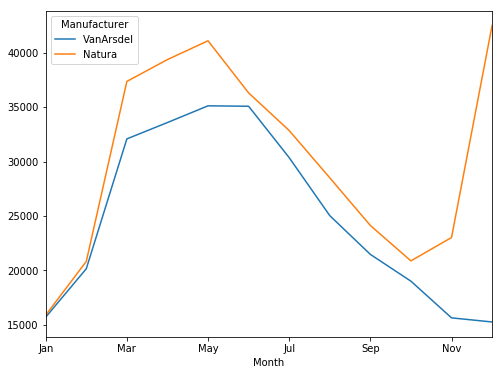

In [29]:
pivot.loc[['VanArsdel','Natura']].transpose().plot(figsize=(8,6))

<a id='stack'></a>
### Stack
[Back to top](#top)

In [30]:
print('Sample DataFrame:')
pivot

Sample DataFrame:


Month           Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep  \
Manufacturer                                                                  
Abbas           869   1261   1934   2230   2154   1946   1667   1675   1383   
Aliqui        10435  13995  24864  30267  32955  26615  19636  19324  14872   
Barba           115    184    385    681    622    517    413    376    264   
Currus         4943   7844  15617  17489  18368  16020  12998  10321   7823   
Fama            471    589   1080   1185   1394   1299    898    894    670   
Leo             250    407    824    976   1078   1022    700    821    607   
Natura        15891  20827  37393  39404  41132  36338  32874  28523  24137   
Palma            62     78    112    134    186    181    143    141     95   
Pirum          7208   8762  16626  17568  18274  16328  12268  12110   9395   
Pomum           653    696   1147   1525   1924   2117   1840   1949   1311   
Quibus         3621   3428   4533   4776   4080   3385   2385   2960   3291   
Salvus           91    146    268    364    378    397    338    327    238   
VanArsdel     15703  20155  32105  33610  35147  35108  30379  25044  21478   
Victoria        539    681   1239   1421   1595   1537   1163   1171    863   

Month           Oct    Nov    Dec  
Manufacturer                       
Abbas          1346   1158   1549  
Aliqui        12343  12735  26333  
Barba           226    143    103  
Currus         6681   6157  10210  
Fama            599    425    587  
Leo             456    335    360  
Natura        20882  23030  42541  
Palma           151    155    126  
Pirum          7770   7276  10041  
Pomum          1121    826    996  
Quibus         3090   3119   3814  
Salvus          138    114    105  
VanArsdel     19012  15638  15260  
Victoria        701    515    514

In [31]:
print('Make the columns stacked:')
df = pivot.stack()
df

Make the columns stacked:


Manufacturer  Month
Abbas         Jan        869
              Feb       1261
              Mar       1934
              Apr       2230
              May       2154
              Jun       1946
              Jul       1667
              Aug       1675
              Sep       1383
              Oct       1346
              Nov       1158
              Dec       1549
Aliqui        Jan      10435
              Feb      13995
              Mar      24864
              Apr      30267
              May      32955
              Jun      26615
              Jul      19636
              Aug      19324
              Sep      14872
              Oct      12343
              Nov      12735
              Dec      26333
Barba         Jan        115
              Feb        184
              Mar        385
              Apr        681
              May        622
              Jun        517
                       ...  
Salvus        Jul        338
              Aug        327
              Sep      

In [36]:
print('Unstack Month Column:')
df.unstack()

Unstack Month Column:


Month           Jan    Feb    Mar    Apr    May    Jun    Jul    Aug    Sep  \
Manufacturer                                                                  
Abbas           869   1261   1934   2230   2154   1946   1667   1675   1383   
Aliqui        10435  13995  24864  30267  32955  26615  19636  19324  14872   
Barba           115    184    385    681    622    517    413    376    264   
Currus         4943   7844  15617  17489  18368  16020  12998  10321   7823   
Fama            471    589   1080   1185   1394   1299    898    894    670   
Leo             250    407    824    976   1078   1022    700    821    607   
Natura        15891  20827  37393  39404  41132  36338  32874  28523  24137   
Palma            62     78    112    134    186    181    143    141     95   
Pirum          7208   8762  16626  17568  18274  16328  12268  12110   9395   
Pomum           653    696   1147   1525   1924   2117   1840   1949   1311   
Quibus         3621   3428   4533   4776   4080   3385   2385   2960   3291   
Salvus           91    146    268    364    378    397    338    327    238   
VanArsdel     15703  20155  32105  33610  35147  35108  30379  25044  21478   
Victoria        539    681   1239   1421   1595   1537   1163   1171    863   

Month           Oct    Nov    Dec  
Manufacturer                       
Abbas          1346   1158   1549  
Aliqui        12343  12735  26333  
Barba           226    143    103  
Currus         6681   6157  10210  
Fama            599    425    587  
Leo             456    335    360  
Natura        20882  23030  42541  
Palma           151    155    126  
Pirum          7770   7276  10041  
Pomum          1121    826    996  
Quibus         3090   3119   3814  
Salvus          138    114    105  
VanArsdel     19012  15638  15260  
Victoria        701    515    514

<a id='crosstab'></a>
### Crosstab
[Back to top](#top)

In [37]:
df = pd.read_csv('sampleData2.csv',parse_dates=['Date'])
df

Date      Month  Year  Customer ID  Customer Age  \
0      2013-11-26   November  2013        11019            19   
1      2015-11-26   November  2015        11019            19   
2      2014-03-23      March  2014        11039            49   
3      2016-03-23      March  2016        11039            49   
4      2014-05-15        May  2014        11046            47   
5      2016-05-15        May  2016        11046            47   
6      2014-05-22        May  2014        11047            47   
7      2016-05-22        May  2016        11047            47   
8      2014-02-22   February  2014        11094            35   
9      2016-02-22   February  2016        11094            35   
10     2013-07-30       July  2013        11101            32   
11     2015-07-30       July  2015        11101            32   
12     2013-07-15       July  2013        11109            34   
13     2015-07-15       July  2015        11109            34   
14     2013-08-02     August  2013        11176            29   
15     2015-08-02     August  2015        11176            29   
16     2013-09-02  September  2013        11176            29   
17     2015-09-02  September  2015        11176            29   
18     2014-01-22    January  2014        11176            29   
19     2016-01-22    January  2016        11176            29   
20     2014-05-17        May  2014        11176            29   
21     2016-05-17        May  2016        11176            29   
22     2014-03-27      March  2014        11196            51   
23     2016-03-27      March  2016        11196            51   
24     2013-08-25     August  2013        11203            49   
25     2015-08-25     August  2015        11203            49   
26     2013-12-26   December  2013        11203            49   
27     2015-12-26   December  2015        11203            49   
28     2014-01-02    January  2014        11211            48   
29     2016-01-02    January  2016        11211            48   
...           ...        ...   ...          ...           ...   
113006 2014-03-28      March  2014        28522            28   
113007 2016-03-28      March  2016        28522            28   
113008 2014-01-18    January  2014        28534            32   
113009 2016-01-18    January  2016        28534            32   
113010 2014-04-10      April  2014        28563            25   
113011 2016-04-10      April  2016        28563            25   
113012 2013-09-16  September  2013        29074            20   
113013 2015-09-16  September  2015        29074            20   
113014 2013-12-10   December  2013        29074            20   
113015 2015-12-10   December  2015        29074            20   
113016 2013-10-04    October  2013        29075            20   
113017 2015-10-04    October  2015        29075            20   
113018 2014-07-30       July  2014        29216            33   
113019 2016-07-30       July  2016        29216            33   
113020 2013-10-02    October  2013        29238            34   
113021 2015-10-02    October  2015        29238            34   
113022 2014-03-20      March  2014        29238            34   
113023 2016-03-20      March  2016        29238            34   
113024 2014-04-03      April  2014        29238            34   
113025 2016-04-03      April  2016        29238            34   
113026 2013-07-08       July  2013        29356            29   
113027 2015-07-08       July  2015        29356            29   
113028 2013-12-28   December  2013        29443            41   
113029 2015-12-28   December  2015        29443            41   
113030 2014-04-12      April  2014        29443            41   
113031 2016-04-12      April  2016        29443            41   
113032 2014-04-02      April  2014        29462            18   
113033 2016-04-02      April  2016        29462            18   
113034 2014-03-04      March  2014        29472            37   
113035 2016-03-04      March  2016        29472 

In [59]:
print('Difference between Crosstab and Pivot Table in showing frequency:')

pd.crosstab(df.Year,df['Product Category'],margins=True,margins_name='Total')

Difference between Crosstab and Pivot Table in showing frequency:


Product Category  Accessories  Bikes  Clothing   Total
Year                                                  
2011                        0   2677         0    2677
2012                        0   2677         0    2677
2013                    15025   5710      3708   24443
2014                    20035   4604      4759   29398
2015                    15025   5710      3708   24443
2016                    20035   4604      4759   29398
Total                   70120  25982     16934  113036

In [63]:
df.pivot_table(index='Year',columns='Product Category',values='Revenue',aggfunc=lambda x: len(x),
               margins=True,margins_name='Total')

Product Category  Accessories    Bikes  Clothing   Total
Year                                                    
2011                      NaN   2677.0       NaN    2677
2012                      NaN   2677.0       NaN    2677
2013                  15025.0   5710.0    3708.0   24443
2014                  20035.0   4604.0    4759.0   29398
2015                  15025.0   5710.0    3708.0   24443
2016                  20035.0   4604.0    4759.0   29398
Total                 70120.0  25982.0   16934.0  113036

In [94]:
print('Share of Revenue of each Product per Year')

pd.crosstab(df.Year,df['Product Category'],values=df['Revenue'],aggfunc=np.mean,normalize='index')*100

Share of Revenue of each Product per Year


Product Category  Accessories   Bikes  Clothing
Year                                           
2011                     0.00  100.00      0.00
2012                     0.00  100.00      0.00
2013                     9.04   69.33     21.63
2014                     9.16   70.65     20.19
2015                     6.56   77.75     15.69
2016                     6.61   78.74     14.65